In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [47]:
def create_dataset(n=1250, nf=2, nr=0, ni=2, random_state=125):
    '''
    generate a new dataset with
    n: total number of samples
    nf: number of features
    nr: number of redundant features (these are linear combinatins of
    informative features)
                    ni: number of informative features (ni + nr = nf must hold)
    random_state: set for reproducibility
    '''
    X, y = make_classification( n_samples=n,
                                n_features=nf,
    n_redundant=nr,
    n_informative=ni,
    random_state=random_state,
    n_clusters_per_class=2)
    rng = np.random.RandomState(2)
    X += 3 * rng.uniform(size = X.shape)
    X = StandardScaler().fit_transform(X)
    return X, y

def plotter(classifier, X, X_test, y_test, title, ax=None):
    # plot decision boundary for given classifier
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax:
        ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        ax.set_title(title)
    else:
        plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        plt.title(title)

In [48]:
X, y = create_dataset()

In [49]:
# Question a

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1000, 2)
(250, 2)
(1000,)
(250,)
(1250, 2)
(1250,)


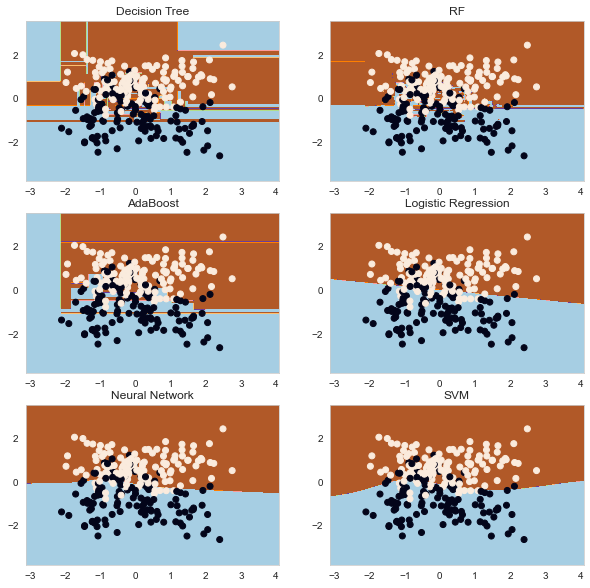

In [51]:
mods = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression(), MLPClassifier(), SVC()]
titles = ["Decision Tree", "RF", "AdaBoost", "Logistic Regression", "Neural Network", "SVM"]
fig, ax = plt.subplots(3,2, figsize=(10,10))

for i, ax in enumerate(ax.flat):
    mod = mods[i]
    mod.fit(X_train, y_train)
    plotter(mod, X, X_test, y_test, titles[i], ax)
# plt.savefig("figures/boundaries.png")
plt.show()

In [52]:
# Question b

def train_mod(mod, X_train, y_train, X_test, y_test, train_size):
    idxs = np.random.choice(X_train.shape[0], size=train_size)  # replace default = True
    Xp = X_train[idxs]
    yp = y_train[idxs]
    mod.fit(Xp, yp)
    return np.mean(mod.predict(X_test) == y_test)

model_titles = ["Decision Tree", "RF", "AdaBoost", "Logistic Regression", "Neural Network", "SVM"]
mods = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression(), MLPClassifier(), SVC()]
train_sizes = [25,50] + [100 + 100*i for i in range(10)]

mod_mean_accuracies = np.zeros(shape=(len(model_titles), len(train_sizes)))

for mod_idx, mod in enumerate(mods):
    mean_accuracies = np.zeros(shape=(10, len(train_sizes)))    # 每个train size的10次结果
    for i in range(10):
        for j, tr in enumerate(train_sizes):
            mean_accuracies[i, j] = train_mod(mod, X_train, y_train, X_test, y_test, tr)
    mod_mean_accuracies[mod_idx,:] = mean_accuracies.mean(axis=0)


/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.

In [53]:
mod_mean_accuracies

array([[0.7044, 0.716 , 0.6912, 0.748 , 0.736 , 0.738 , 0.7188, 0.744 ,
        0.7272, 0.732 , 0.72  , 0.7348],
       [0.79  , 0.7748, 0.776 , 0.768 , 0.768 , 0.7668, 0.76  , 0.7636,
        0.7604, 0.7532, 0.7684, 0.7744],
       [0.7504, 0.7272, 0.7396, 0.7304, 0.7508, 0.7656, 0.778 , 0.77  ,
        0.7788, 0.778 , 0.78  , 0.7768],
       [0.8048, 0.812 , 0.8096, 0.8184, 0.8184, 0.8156, 0.818 , 0.8184,
        0.8204, 0.8184, 0.8152, 0.8168],
       [0.7852, 0.8008, 0.816 , 0.8164, 0.82  , 0.8196, 0.8196, 0.8172,
        0.8184, 0.816 , 0.8296, 0.8192],
       [0.7392, 0.8088, 0.808 , 0.8116, 0.8176, 0.8228, 0.8228, 0.8192,
        0.8256, 0.8212, 0.8224, 0.8208]])

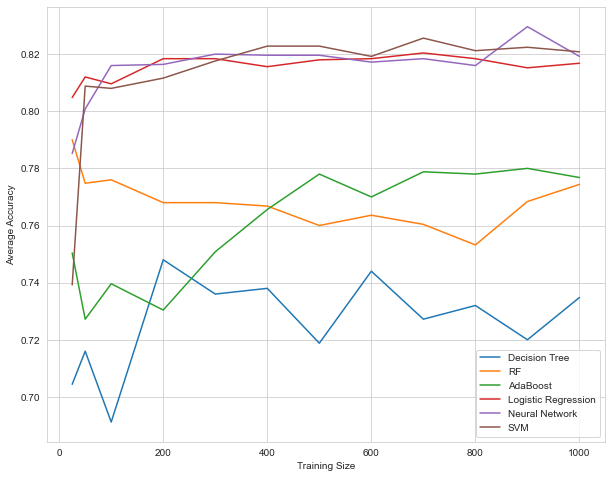

In [54]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

for i in range(6):
    plt.plot(train_sizes, mod_mean_accuracies[i], label=titles[i])
    plt.xlabel("Training Size")
    plt.ylabel("Average Accuracy")
plt.legend()
# plt.savefig("figures/Accuracy.png")
plt.show()

In [55]:
# Question c

def train_mod(mod, X_train, y_train, X_test, y_test, train_size):
    idxs = np.random.choice(X_train.shape[0], size=train_size)  # replace default = True
    Xp = X_train[idxs]
    yp = y_train[idxs]
    mod.fit(Xp, yp)
    return np.mean(mod.predict(X_test) == y_test)

model_titles = ["Decision Tree", "RF", "AdaBoost", "Logistic Regression", "Neural Network", "SVM"]
mods = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression(), MLPClassifier(), SVC()]
train_sizes = [25,50] + [100 + 100*i for i in range(10)]

mod_mean_accuracies = np.zeros(shape=(len(model_titles), len(train_sizes)))
mod_mean_time = np.zeros(shape=(len(model_titles), len(train_sizes)))

for mod_idx, mod in enumerate(mods):
    mean_accuracies = np.zeros(shape=(10, len(train_sizes)))    # 每个train size的10次结果
    mean_times = np.zeros(shape=(10, len(train_sizes)))
    for i in range(10):
        for j, tr in enumerate(train_sizes):
            tstart = time.time()
            mean_accuracies[i, j] = train_mod(mod, X_train, y_train, X_test, y_test, tr)
            tend = time.time()
            mean_times[i, j] = tend - tstart
    mod_mean_accuracies[mod_idx,:] = mean_accuracies.mean(axis=0)
    mod_mean_time[mod_idx, :] = mean_times.mean(axis=0)


/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/nlp/lib/python3.

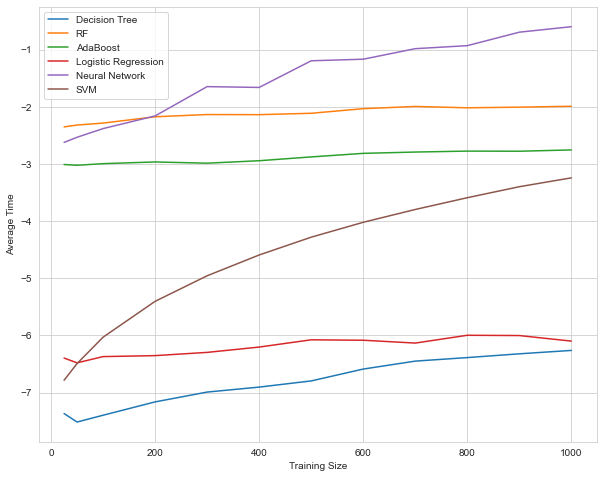

In [56]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

for i in range(6):
    plt.plot(train_sizes, np.log(mod_mean_time[i]), label=titles[i])
    plt.xlabel("Training Size")
    plt.ylabel("Average Time")
plt.legend()
# plt.savefig("figures/Accuracy.png")
plt.show()